#### Data Preprocessing

In [1]:
# Inserting  the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
%matplotlib inline

#### Data Loading

In [2]:
#Importing the training data
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

#### Data Preprocessing and Visualization

In [4]:
#changing vairable to datetime format
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

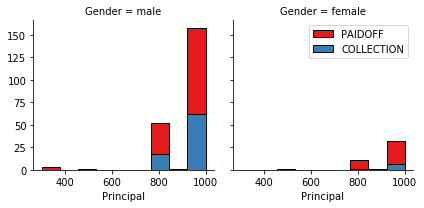

In [6]:
#Genderwise histogram of Principal vs loan status 
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

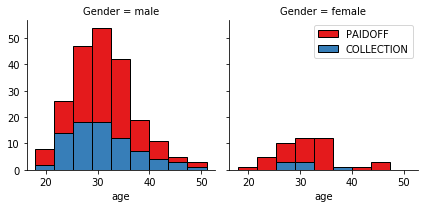

In [7]:
#Genderwise histogram of Age vs loan status 
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

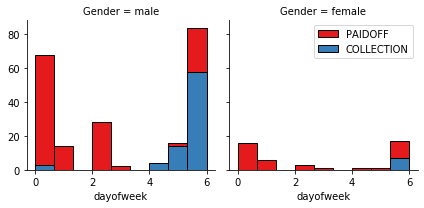

In [8]:
#Genderwise histogram of Day_of_week vs loan status 
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [9]:
#Creating new column of weekend
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [10]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [11]:
#Converting Categorical features to numerical values
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [12]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [13]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Feature Selection

In [14]:
# Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [15]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [16]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### Normalizing Data

In [17]:
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [18]:
# Spliting data in train and test with ratio of 4:1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


#### K Nearest Neighbor (KNN) Classifier Model

In [19]:
# KNN classifier model creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

K = 30
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):

    KNN_model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=KNN_model.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       , 0.72857143, 0.7       , 0.7       , 0.68571429,
       0.72857143, 0.72857143, 0.72857143, 0.7       , 0.68571429,
       0.71428571, 0.68571429, 0.7       , 0.7       , 0.72857143,
       0.71428571, 0.77142857, 0.68571429, 0.78571429])

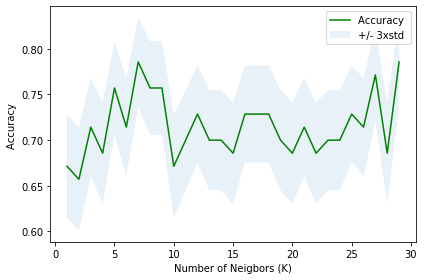

In [20]:
# Plotting Accuracy Vs Nearest Neighbor
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neigbors (K)')
plt.tight_layout()
plt.show()

In [21]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 7


In [22]:
# Prediction and Regression score of KNN classifier model
yhat = KNN_model.predict(X_test)
yhat[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### Decision Tree Classifier Model

In [23]:
# Logistic Decision Tree classifier model creation
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 4,  min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2).fit(X_train, y_train)
DT_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [24]:
# Prediction and Regression score of Decision Tree classifier model
yhat = DT_model.predict(X_test)
DT_model_scores = float(DT_model.score(X_test, y_test))

print('Decision Tree Scores: ', DT_model_scores)

Decision Tree Scores:  0.7


#### Support Vector Machine(SVM) Classifier Model

In [25]:
# Logistic SVM classifier model creation
from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
# Prediction and Regression score of SVM classifier model 
yhat = SVM_model.predict(X_test)
SVM_model_scores = float(SVM_model.score(X_test, y_test))

print('Support Vector Machine Scores:', SVM_model_scores)

Support Vector Machine Scores: 0.7428571428571429


#### Logistic Regression Model

In [27]:
# Logistic Regression model creation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR_model = LogisticRegression(C=0.06, solver='sag').fit(X_train,y_train)
LR_model

LogisticRegression(C=0.06, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Prediction and Regression score of Logistic Regression model 
yhat = LR_model.predict(X_test)
LR_model_scores = float(LR_model.score(X_test, y_test))
print('Logistic Regresion Scores:',LR_model_scores)

Logistic Regresion Scores: 0.7571428571428571


#### Model Evaluation

In [29]:
# Importing metrics libraries
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [30]:
# Importing Test dataset
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [31]:
# Preprocessing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_X = StandardScaler().fit(test_Feature).transform(test_Feature)
test_X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [32]:
test_y = test_df['loan_status'].values
test_y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [33]:
# Evaluation of KNN classifier model
knn_yhat = KNN_model.predict(test_X)
knn_jc= round(jaccard_score(test_y, knn_yhat,pos_label='PAIDOFF'),2)
knn_f1s=round(f1_score(test_y, knn_yhat, average='weighted'),2)
print("KNN Jaccard index: %.2f" % knn_jc)
print("KNN F1-score: %.2f" % knn_f1s )

KNN Jaccard index: 0.78
KNN F1-score: 0.77


In [34]:
# Evaluation of Decision Tree classifier model
DT_yhat = DT_model.predict(test_X)
DT_jc=round(jaccard_score(test_y, DT_yhat,pos_label='PAIDOFF'),2)
DT_f1s=round(f1_score(test_y, DT_yhat, average='weighted'),2)
print("DT Jaccard index: %.2f" % DT_jc)
print("DT F1-score: %.2f" % DT_f1s )

DT Jaccard index: 0.67
DT F1-score: 0.66


In [35]:
# Evaluation of SVM model
SVM_yhat = SVM_model.predict(test_X)
SVM_jc=round(jaccard_score(test_y, SVM_yhat,pos_label='PAIDOFF'),2)
SVM_f1s=round(f1_score(test_y, SVM_yhat, average='weighted'),2)
print("SVM Jaccard index: %.2f" % SVM_jc)
print("SVM F1-score: %.2f" % SVM_f1s)

SVM Jaccard index: 0.78
SVM F1-score: 0.76


In [36]:
# Evaluation of Logistic Regression model
LR_yhat = LR_model.predict(test_X)
LR_yhat_prob = LR_model.predict_proba(test_X)
LR_jc=round(jaccard_score(test_y, LR_yhat,pos_label='PAIDOFF'),2)
LR_f1s=round(f1_score(test_y, LR_yhat, average='weighted'),2)
LR_logl=round(log_loss(test_y, LR_yhat_prob),2)
print("LR Jaccard index: %.2f" % LR_jc)
print("LR F1-score: %.2f" %  LR_f1s)
print("LR LogLoss: %.2f" % LR_logl)

LR Jaccard index: 0.75
LR F1-score: 0.67
LR LogLoss: 0.48


#### Report of various Classification Models

In [37]:
# Creating Metrics of various models
data = [
        ['KNN', knn_jc, knn_f1s, 'NA'], 
        ['Decision Tree', DT_jc, DT_f1s, 'NA'],
        ['SVM', SVM_jc, SVM_f1s, 'NA'],
        ['LogisticRegression', LR_jc, LR_f1s, LR_logl],
       ]
report = pd.DataFrame(data, columns=['Alogirthms', 'Jaccard', 'F1-score', 'LogLoss'])
report.head()

,Alogirthms,Jaccard,F1-score,LogLoss
0,KNN,0.78,0.77,NA
1,Decision Tree,0.67,0.66,NA
2,SVM,0.78,0.76,NA
3,LogisticRegression,0.75,0.67,0.48
